In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [5]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


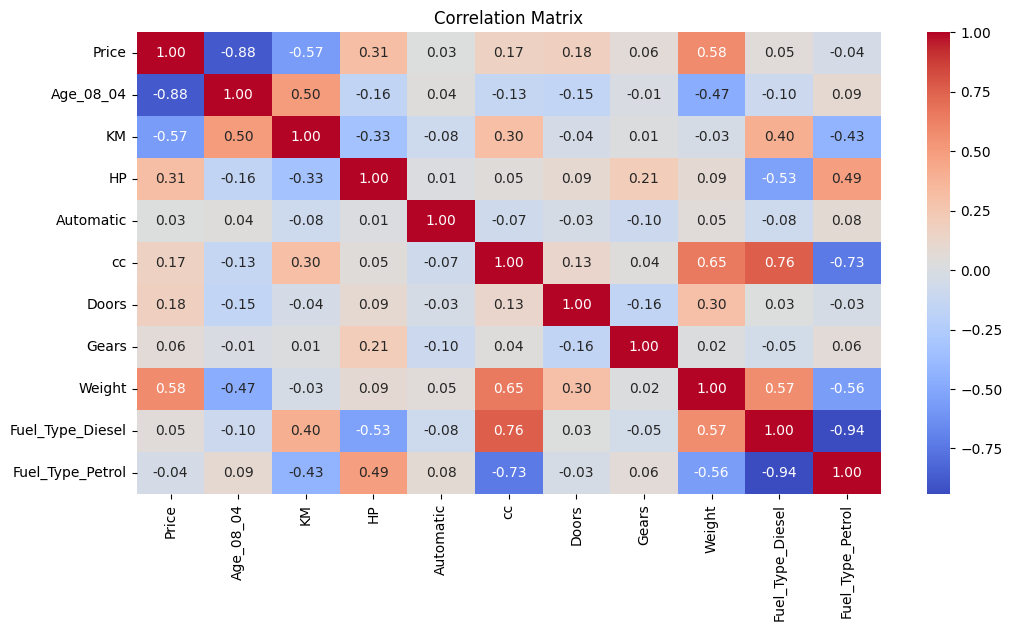

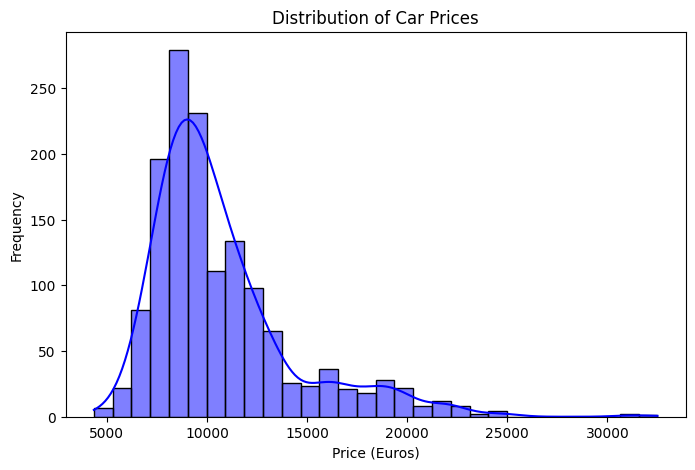

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Drop unnecessary columns
df = df.drop(columns=["Cylinders"])

# Remove outliers in CC (Filtering values greater than 4000)
df = df[df["cc"] < 4000]

# One-hot encode Fuel_Type
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")
plt.show()


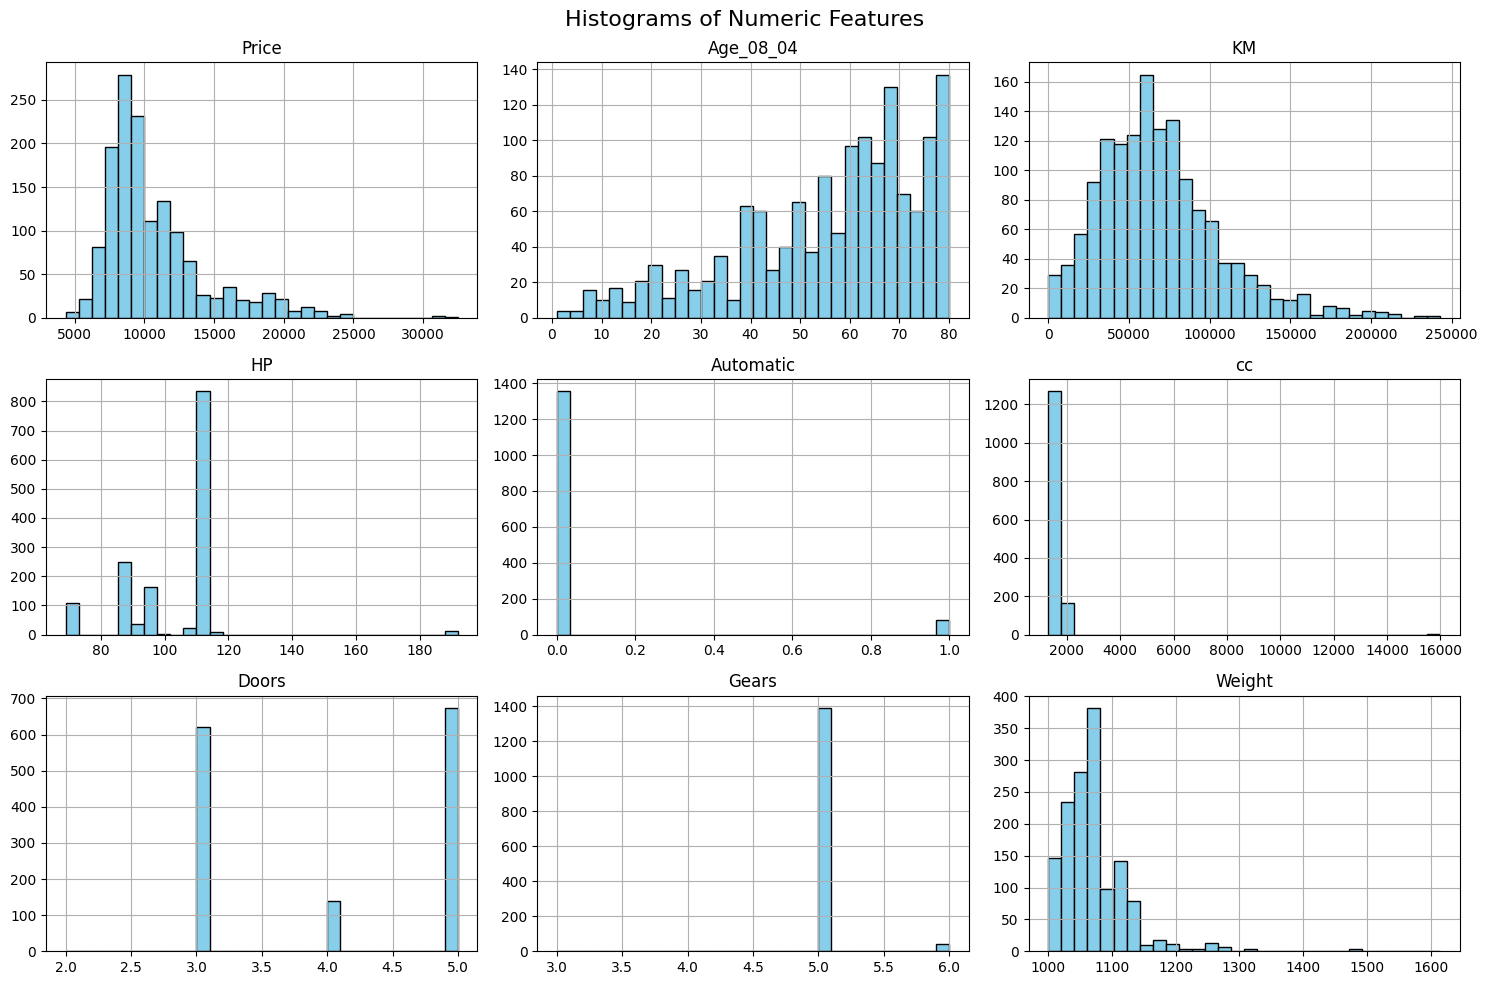

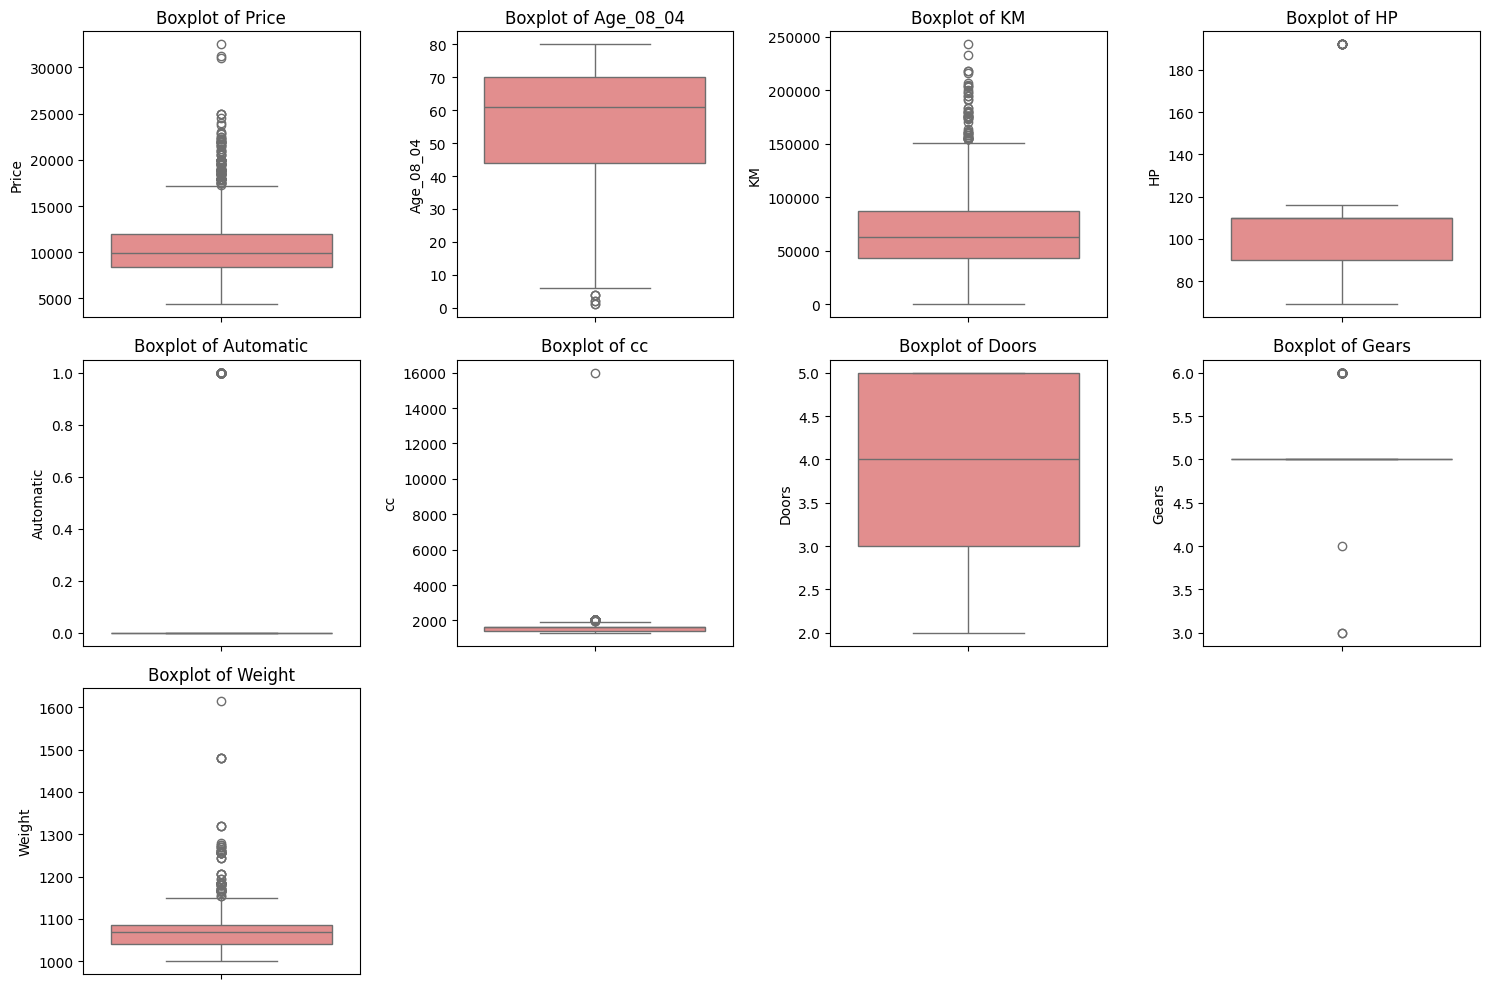

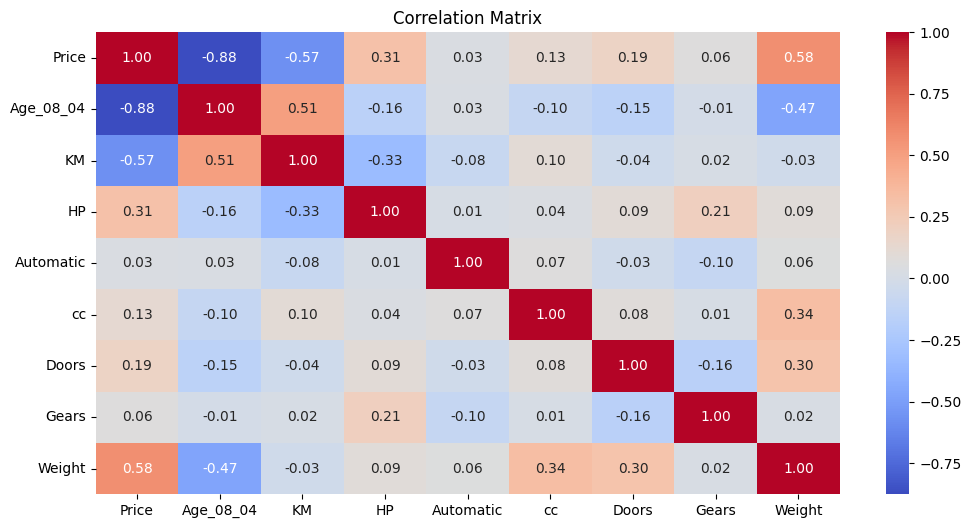

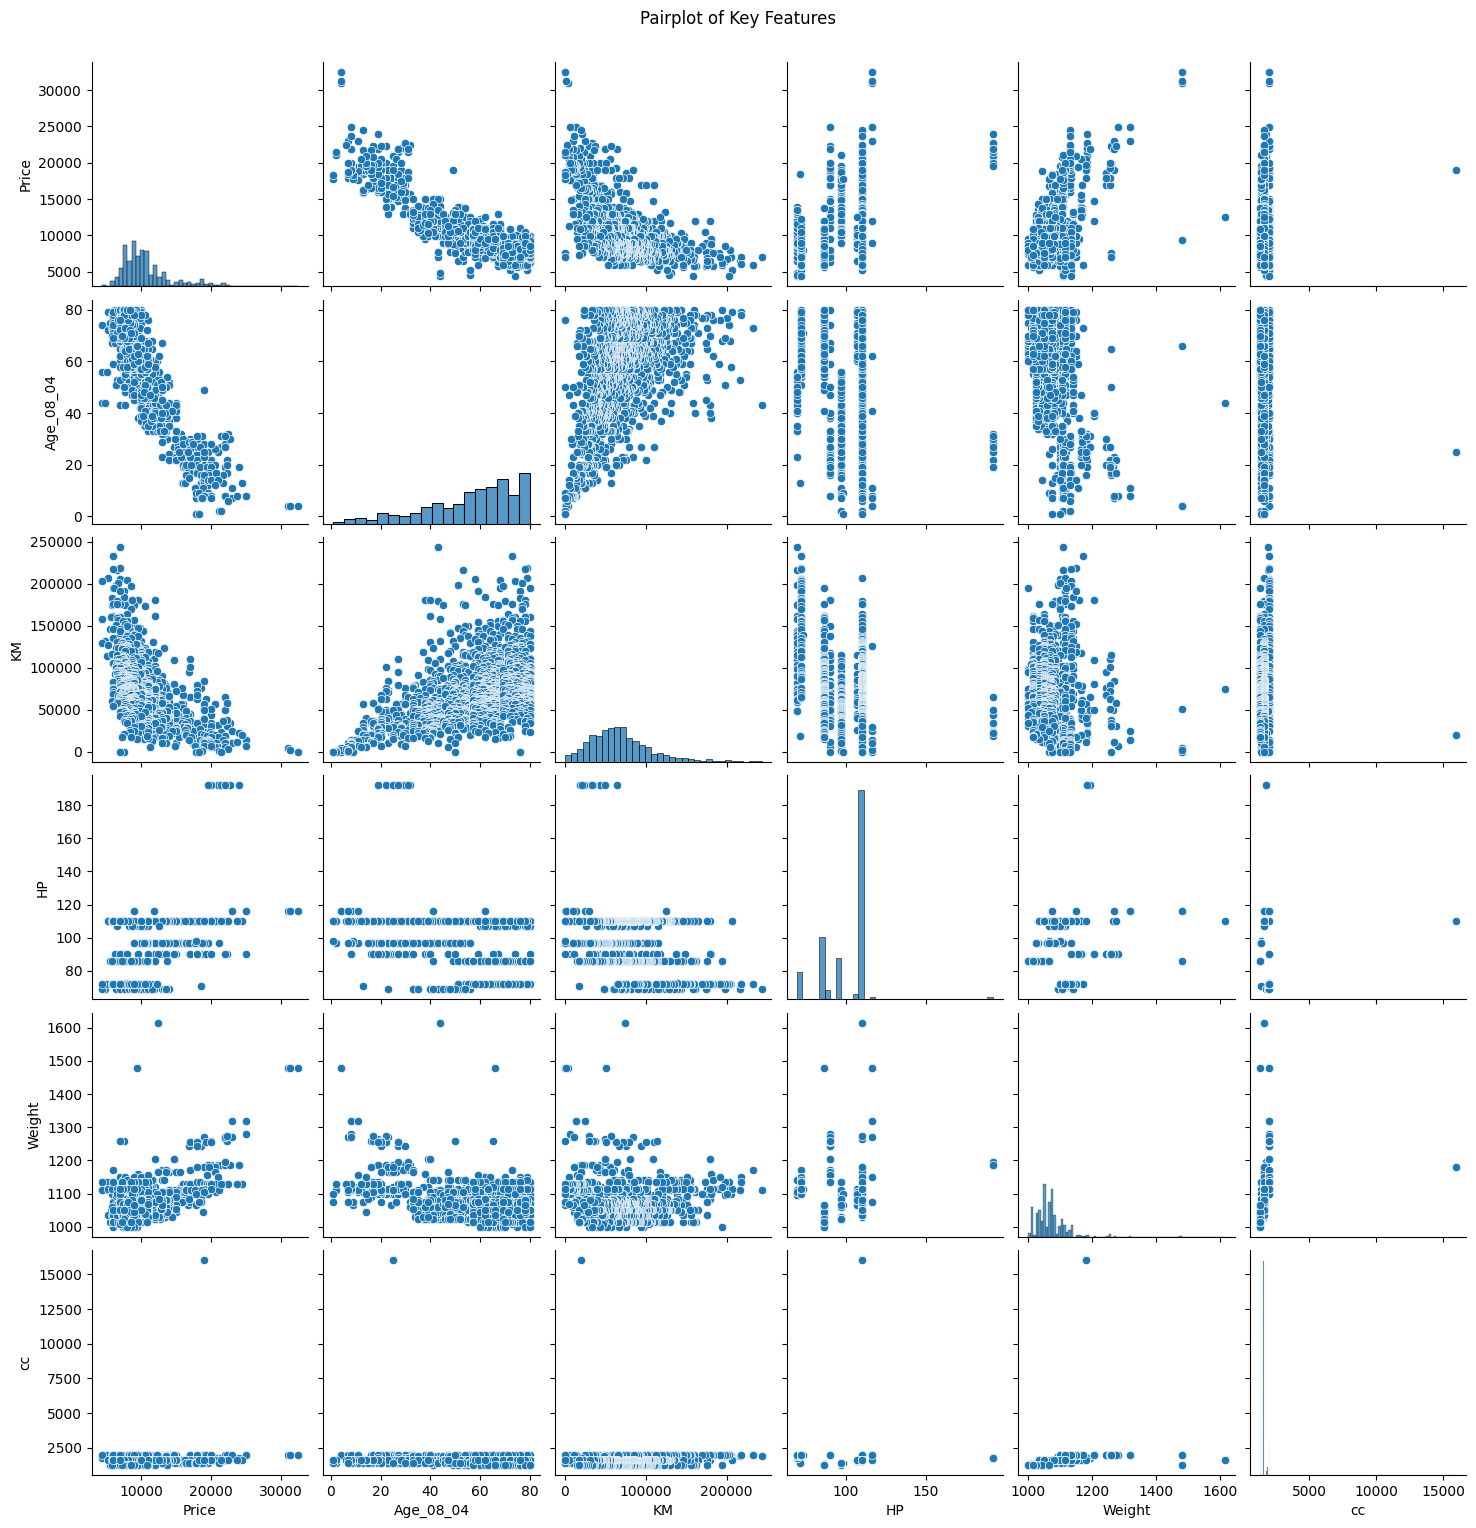

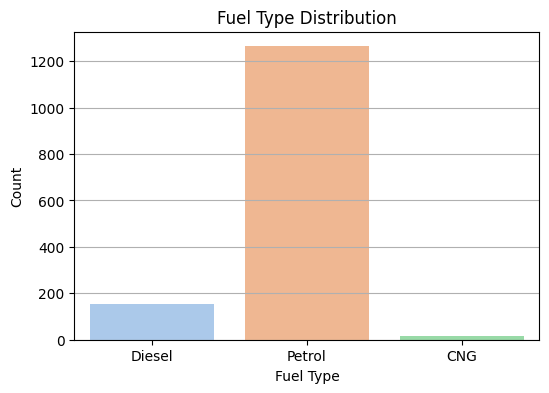

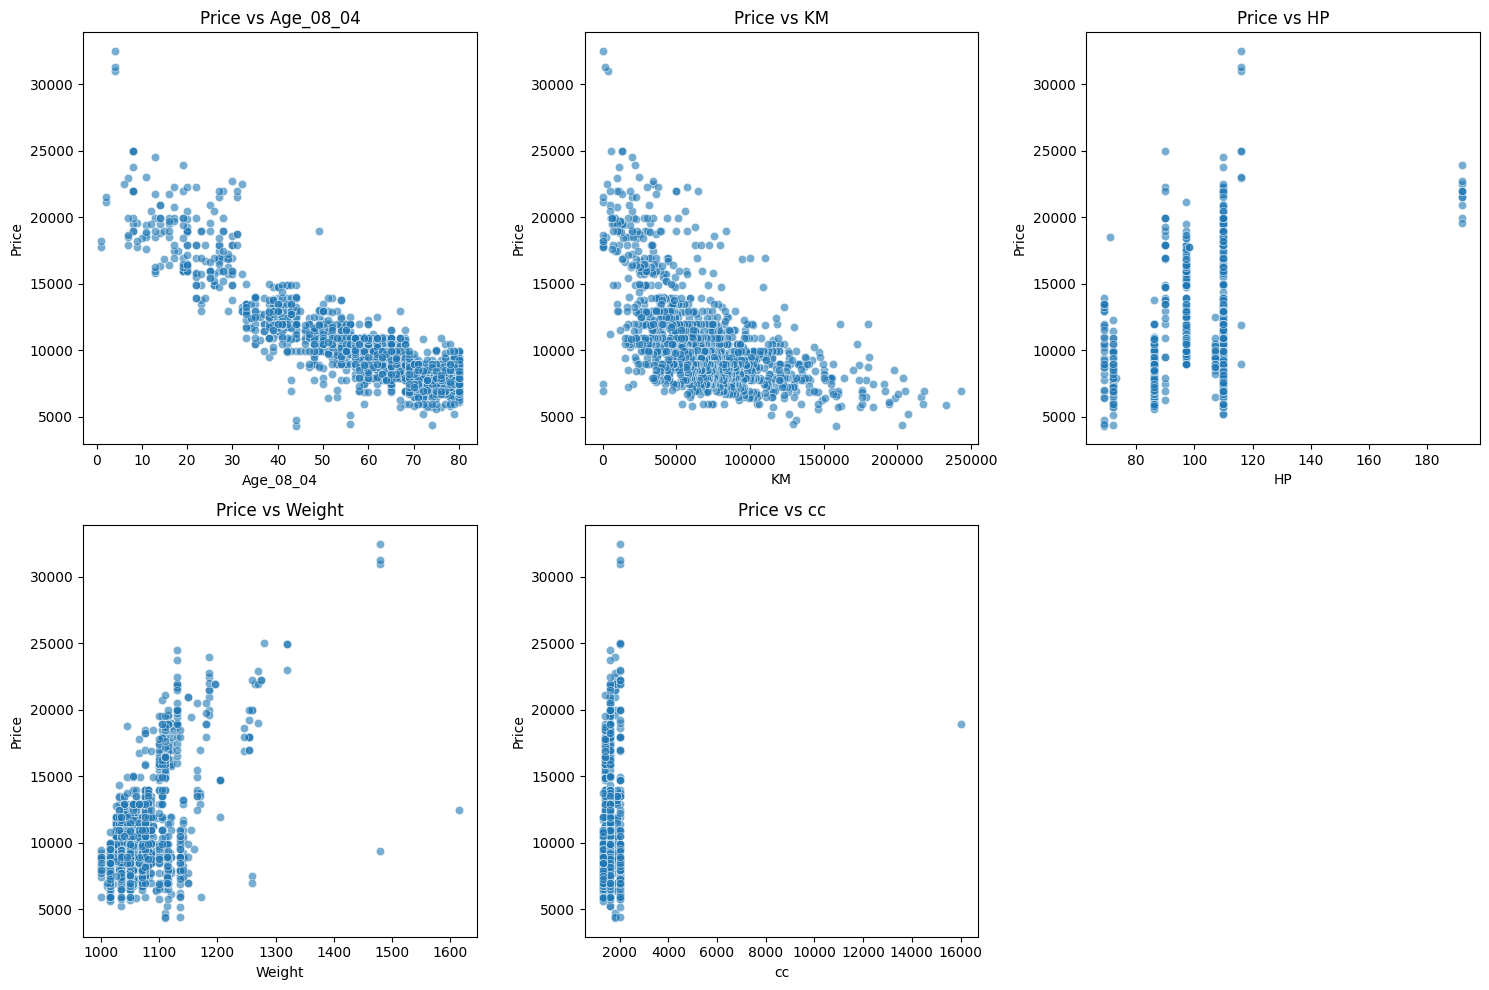

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop unnecessary column if not already done
df = df.drop(columns=["Cylinders"], errors='ignore')

# ========== 1. Histograms for all numeric features ==========
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# ========== 2. Boxplots for detecting outliers ==========
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# ========== 3. Correlation Heatmap ==========
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ========== 4. Pairplot ==========
sns.pairplot(df[["Price", "Age_08_04", "KM", "HP", "Weight", "cc"]])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# ========== 5. Bar Plot: Fuel Type Distribution ==========
plt.figure(figsize=(6, 4))
sns.countplot(x="Fuel_Type", data=df, palette="pastel")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

# ========== 6. Scatterplots of Price vs Key Features ==========
key_features = ["Age_08_04", "KM", "HP", "Weight", "cc"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df["Price"], alpha=0.6)
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [ ]:
y=df['Price']

In [ ]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (1148, 10) (1148,)
Testing Set: (287, 10) (287,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# ========== MODEL 1: BASELINE MULTIPLE LINEAR REGRESSION ==========
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

# Coefficients & Intercept
print("Baseline Model Coefficients:", lr1.coef_)
print("Intercept:", lr1.intercept_)

# ========== MODEL 2: FEATURE-REDUCED MULTIPLE LINEAR REGRESSION ==========
# Selecting important features based on correlation analysis
important_features = ["Age_08_04", "KM", "HP", "Weight"]
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

lr2 = LinearRegression()
lr2.fit(X_train_reduced, y_train)

# Coefficients & Intercept
print("Reduced Model Coefficients:", lr2.coef_)
print("Intercept:", lr2.intercept_)

# ========== MODEL 3: POLYNOMIAL REGRESSION ==========
poly = PolynomialFeatures(degree=2)  # Second-degree polynomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr3 = LinearRegression()
lr3.fit(X_train_poly, y_train)

# Coefficients & Intercept
print("Polynomial Model Intercept:", lr3.intercept_)
print("Number of Polynomial Features:", len(lr3.coef_))


Baseline Model Coefficients: [-1.18986112e+02 -1.54273185e-02  4.67219310e+01  3.10463096e+02
 -3.58758039e+00 -4.65515148e+01  3.38214724e+02  2.60373545e+01
  1.96445701e+03  1.03145541e+03]
Intercept: -11248.060677521005
Reduced Model Coefficients: [-1.19778764e+02 -2.03296068e-02  3.15354543e+01  2.05075796e+01]
Intercept: -6366.8186111876075
Polynomial Model Intercept: -71526.2268327592
Number of Polynomial Features: 66


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {model_name} Evaluation =====")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    return r2, mae, rmse

# Evaluate the models
eval_baseline = evaluate_model(lr1, X_test, y_test, "Baseline Model")
eval_reduced = evaluate_model(lr2, X_test_reduced, y_test, "Feature-Reduced Model")
eval_poly = evaluate_model(lr3, X_test_poly, y_test, "Polynomial Model")



===== Baseline Model Evaluation =====
R² Score: 0.8226
Mean Absolute Error (MAE): 949.20
Mean Squared Error (MSE): 2038576.99
Root Mean Squared Error (RMSE): 1427.79

===== Feature-Reduced Model Evaluation =====
R² Score: 0.8328
Mean Absolute Error (MAE): 985.11
Mean Squared Error (MSE): 1920838.64
Root Mean Squared Error (RMSE): 1385.94

===== Polynomial Model Evaluation =====
R² Score: 0.6728
Mean Absolute Error (MAE): 945.31
Mean Squared Error (MSE): 3759761.96
Root Mean Squared Error (RMSE): 1939.01


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# ===== Ridge Regression =====
ridge = Ridge(alpha=1.0)  # Alpha controls regularization strength
ridge.fit(X_train, y_train)

# Evaluate Ridge Model
eval_ridge = evaluate_model(ridge, X_test, y_test, "Ridge Regression")

# ===== Lasso Regression =====
lasso = Lasso(alpha=1.0)  # Alpha controls regularization strength
lasso.fit(X_train, y_train)

# Evaluate Lasso Model
eval_lasso = evaluate_model(lasso, X_test, y_test, "Lasso Regression")

# Display Coefficients for comparison
print("\n===== Coefficients Comparison =====")
print("Baseline Model Coefficients:", lr1.coef_)
print("Ridge Model Coefficients:", ridge.coef_)
print("Lasso Model Coefficients:", lasso.coef_)



===== Ridge Regression Evaluation =====
R² Score: 0.8207
Mean Absolute Error (MAE): 953.77
Mean Squared Error (MSE): 2060619.22
Root Mean Squared Error (RMSE): 1435.49

===== Lasso Regression Evaluation =====
R² Score: 0.8211
Mean Absolute Error (MAE): 952.53
Mean Squared Error (MSE): 2056013.17
Root Mean Squared Error (RMSE): 1433.88

===== Coefficients Comparison =====
Baseline Model Coefficients: [-1.18986112e+02 -1.54273185e-02  4.67219310e+01  3.10463096e+02
 -3.58758039e+00 -4.65515148e+01  3.38214724e+02  2.60373545e+01
  1.96445701e+03  1.03145541e+03]
Ridge Model Coefficients: [-1.18957918e+02 -1.55241479e-02  4.41613833e+01  2.93700957e+02
 -3.36236997e+00 -5.13655568e+01  3.34836541e+02  2.62875119e+01
  1.58293407e+03  8.50557743e+02]
Lasso Model Coefficients: [-1.18904173e+02 -1.55394769e-02  4.49598172e+01  2.80017132e+02
 -3.43011777e+00 -4.98642296e+01  3.07551874e+02  2.62194484e+01
  1.64984529e+03  8.56205297e+02]


**What is Normalization & Standardization and how is it helpful?**

Normalization and standardization are two common techniques in data preprocessing used to adjust the scale of features, especially when working with machine learning algorithms. They help improve model performance and convergence speed.



Improves Model Performance:
Models converge faster and behave better when features are on a similar scale.


Essential for Distance-Based Algorithms:
Algorithms like KNN or K-means are sensitive to feature scales.


Avoids Bias Toward Larger Values:
Prevents models from giving more importance to features with larger ranges.


Better Gradient Descent Convergence:
Helps models like neural networks learn more effectively.

**What techniques can be used to address multicollinearity in multiple linear regression?**

Techniques to Address Multicollinearity

** Principal Component Analysis (PCA)**
What: Transforms correlated variables into a smaller set of uncorrelated components.
Why: Removes multicollinearity while keeping most of the variance.

**Regularization (Ridge or Lasso Regression)**

📌 Ridge Regression (L2):
Shrinks coefficients of correlated variables.

Keeps all variables, but penalizes large coefficients.

📌 Lasso Regression (L1):
Can eliminate some coefficients (performs variable selection).

Useful when you suspect some predictors don’t add value.

**Centering the Variables (Mean Subtraction)**
What: Subtract the mean from predictors (especially in interaction terms).
Why: Helps reduce collinearity between interaction terms and individual predictors.

